In [ ]:
#importação de todas as bibliotecas/módulos necessários para o funcionamento do código
import pandas as pd
import numpy as np
from random import sample
import matplotlib.pyplot as plt
import matplotlib.colors as pltc

#leitura de arquivo CSV(valores separado por vírgulas),reconheço a coluna de índíces como a coluna '#' do arquivo
df = pd.read_csv('C:/Users/davic/Downloads/pokemon/Pokemon.csv',index_col='#')

#esta linha foi usada no começo para ter noção de quantos valores NA o dataset tinha, mas não tinha nenhum
df.isna().sum()

# O primeiro objetivo foi traduzir os termos das colunas de tipos de pokemons
#todos os diferentes nomes dos tipos em inglês
tipo_unico = df['Type 1'].unique()

#tradução manual de cada nome em lista
traducao = ['Grama', 'Fogo', 'Água', 'Inseto', 'Normal', 'Veneno', 'Elétrico', 'Terra',
'Fada', 'Lutador', 'Psíquico', 'Pedra', 'Fantasma', 'Gelo', 'Dragão',
'Noturno', 'Aço', 'Voador']

#criação de um dicionário, a função zip´transforma as duas listas em uma lista de tuplas de duplas com um valor de cada 
dic_trad = dict(zip(tipo_unico, traducao))

#função replace faz o processo de substituição pelos valores traduzidos de forma bem sucinta
#argumento inplace permite aplicar o efeito na coluna sem ter que designá-la manualmente
df['Type 1'].replace(dic_trad, inplace=True)
df['Type 2'].replace(dic_trad, inplace=True)

#a coluna de cada tipo agora é atualizada com sua versão traduzida
tipo_unico = df['Type 1'].unique()

#função describe permite visualizarmos valores estatísticos básicos, mas importantes, presentes no dataframe
df.describe()

In [675]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Tipo 1,Tipo 2,colors_for_types
#,,,,,,,,,,,,,,,
1,Bulbasaur,Grama,Veneno,318,45,49,49,65,65,45,1,False,0,0,0.000000
2,Ivysaur,Grama,Veneno,405,60,62,63,80,80,60,1,False,0,0,0.000000
3,Venusaur,Grama,Veneno,525,80,82,83,100,100,80,1,False,0,0,0.000000
3,VenusaurMega Venusaur,Grama,Veneno,625,80,100,123,122,120,80,1,False,0,0,0.000000
4,Charmander,Fogo,NaN,309,39,52,43,60,50,65,1,False,0,0,0.058824


In [578]:
#Aqui todos os casos de pokemons lendários são somados e no print dividido por toda extensão da coluna, visto que True == 1
Lendarios = df['Legendary'] == True
soma = Lendarios.sum()
#Assim podemos saber a porcentagem de quantos pokemons tem tal característica neste dataframe
print('{}% dos pokemons são lendários.'.format(100*soma/len(df['Legendary'])))

8.125% dos pokemons são lendários.


In [579]:
#Aqui retiramos o maior e menor valor dessas duas colunas com base nas funções autoexplicativas
ataque = df['Name'].loc[df['Attack'].max()]
defesa = df['Name'].loc[df['Defense'].max()]
velocidade = df['Name'].loc[df['Speed'].max()]
vida = df['Name'].loc[df['HP'].max()]
#no caso '.loc' é forma que permitiu acesso de índices que respeitassem as condições impostas
#agora algumas destas informação da tabela do 'describe()' estão em texto
print(f'O pokemon com o ataque mais forte é {ataque},\n'
       f' já o que possui a defesa mais forte é {defesa},\n'
       f' o mais veloz é {velocidade},\n'
       f' e o que tem mais vida é {vida}.')

O pokemon com o ataque mais forte é Aipom,
 já o que possui a defesa mais forte é Kingdra,
 o mais veloz é Flaaffy,
 e o que tem mais vida é Torchic.


In [580]:
#Aqui uma compreensão de dicionário foi construída afim de contabilizar cada grupo->
#de pokemons baseados no seu tipo
#len() permite saber o tamanho da lista 
dic = {tipo : (df['Type 1'] == tipo).sum() for tipo in tipo_unico}
print(f'Existem {len(tipo_unico)} tipos de pokemons:')

#um for loop foi criado rodando para cada caso uma chave e um valor do dicionário ->
#baseado no .items(), método que traz estes dois termos do dicionário
for chave, valor in dic.items():
    #para cada caso um novo print
    print(f'\n Referente ao tipo \"{chave}\" temos {valor} pokemons;')

Existem 18 de pokemons:

 Referente ao tipo "Grama" temos 70 pokemons;

 Referente ao tipo "Fogo" temos 52 pokemons;

 Referente ao tipo "Água" temos 112 pokemons;

 Referente ao tipo "Inseto" temos 69 pokemons;

 Referente ao tipo "Normal" temos 98 pokemons;

 Referente ao tipo "Veneno" temos 28 pokemons;

 Referente ao tipo "Elétrico" temos 44 pokemons;

 Referente ao tipo "Terra" temos 32 pokemons;

 Referente ao tipo "Fada" temos 17 pokemons;

 Referente ao tipo "Lutador" temos 27 pokemons;

 Referente ao tipo "Psíquico" temos 57 pokemons;

 Referente ao tipo "Pedra" temos 44 pokemons;

 Referente ao tipo "Fantasma" temos 32 pokemons;

 Referente ao tipo "Gelo" temos 24 pokemons;

 Referente ao tipo "Dragão" temos 32 pokemons;

 Referente ao tipo "Noturno" temos 31 pokemons;

 Referente ao tipo "Aço" temos 27 pokemons;

 Referente ao tipo "Voador" temos 4 pokemons;


In [581]:
#Decidi construir uma função que conversa com um usuário de forma->
# a pesquisar a geração de cada pokemon pedido
def gerac_pokemon():
    #funciona indefinidamente
    while True:
        nome = input('Me diga o nome do pokemon e eu direi a sua seus dados!\n'
                     '[ou aperte 1 para sair]\n')
        #oferece a possibilidade de terminar a sessão
        if nome == '1':
            print('Até mais!')
            break 
        #a variavél 'res' guarda o número da linha em que o nome inserido bateu com o do dataframe 
        #isso em formato de array do NumPy
        res = np.asarray(df.loc[df['Name']==nome]['Generation'])
        #se o nome não bater com a base de dados seu valor é feito quase que um raise ValuError->
        #mas que não termine a sessão 
        if len(res) <= 0 :
            print('O nome do pokemon está errado. Por favor digite de novo! ')    
        #ocorrendo tudo certo, é imformado o numero da geração
        else:
            print(f"{nome} é da {res} geração.")
        #não retorna nada
        return None 

#função chamada para o programinha funcionar
gerac_pokemon()

Me diga o nome do pokemon e eu direi a sua seus dados!
[ou aperte 1 para sair]
Machamp
1
Machamp é da [1] geração.
Me diga o nome do pokemon e eu direi a sua seus dados!
[ou aperte 1 para sair]
1
Até mais!


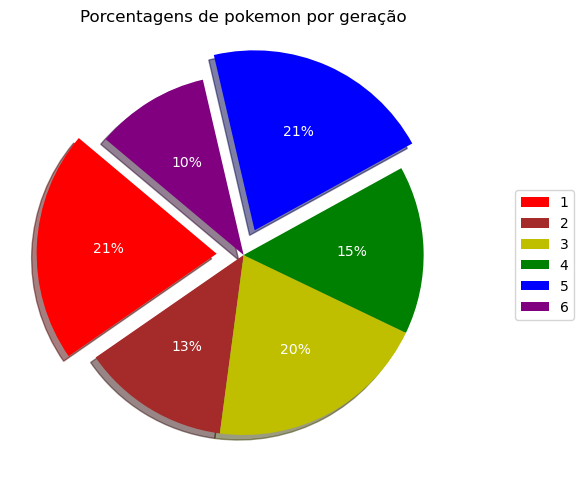

In [685]:
#Gráfico de piza
#constrói uma figura, um objeto espaço em branco com determinado espaço e resolução
fig = plt.figure(figsize=(8,5),dpi=100)
#axes é um instancia criada deste objeto,e no caso, com um ajuste do seu formato
axes = fig.add_axes([0.1,0.1,0.9,0.9])

#valores unicos de quantas gerações retirado
gen_nome = df["Generation"].unique()
#contabilização de quantos pokemons em cada geração por meio de uma compreensão em lista
gen_val = [(df["Generation"] == gen).sum() for gen in geracs]

#criação de 6 valores aleatórios entre 0 e 1, por meio da função random.rand()
colors = np.array(np.random.rand(6))
#cada valor será então designado a uma cor como código RGBA

#explode é uma variável que faz referência à capacidade do gráfico em pizza->
#de morrer suas fatias pra fora da pizza,e assim trazer um melhor efeito visual

#porcentagens em geral ficam em seus lugares
explode = [0]* len(gen_nome)
#após ver como o gráfico ficou expandi um pouco as duas maiores porcentagens
explode[0] = 0.15
explode[-2] = 0.15

#o plt.pie() contrói o gráfico em pizza, e nisso foram inseridos a explosão,->
#as 'labels' de cada valor, as cores, sombra, e também o argumento de autoporcentagem ->
#para colocar o número na melhor formatação. Além disso temos o ângulo de inclinação->
#da pizza em 140 graus e o texto das porcentagens é posto em branco, dentro do dicionário->
#de formatação de textos. Tudo isso salvo em váriáveis que iram fazer a função lenged() funcionar
wedges, texts, autotexts = plt.pie(gen_val, explode = explode,
                                  labels = gen_nome,
                                  colors = ['r','brown','y','g','b','purple'],
                                  autopct='%1.0f%%', shadow=True,
                                  startangle =140, textprops= dict(color='w'))

#plotagem do titulo
plt.title('Porcentagens de pokemon por geração')

#plotagem da legenda em referância às variàveis que precisam ser reverenciadas
#bbox to anchor e loc controlam a posição da legenda
plt.legend(wedges, gen_nome, loc='right',
          bbox_to_anchor=(1,0,0.25,1))    

#savefig() permite salvar o gráfico no diretório do código
plt.savefig("Gráfico_pizza.png", dpi=300)


#plt.show() é a função clássica de mostrar a plotagem, mas irrelevante no jupyter notebook
plt.show()

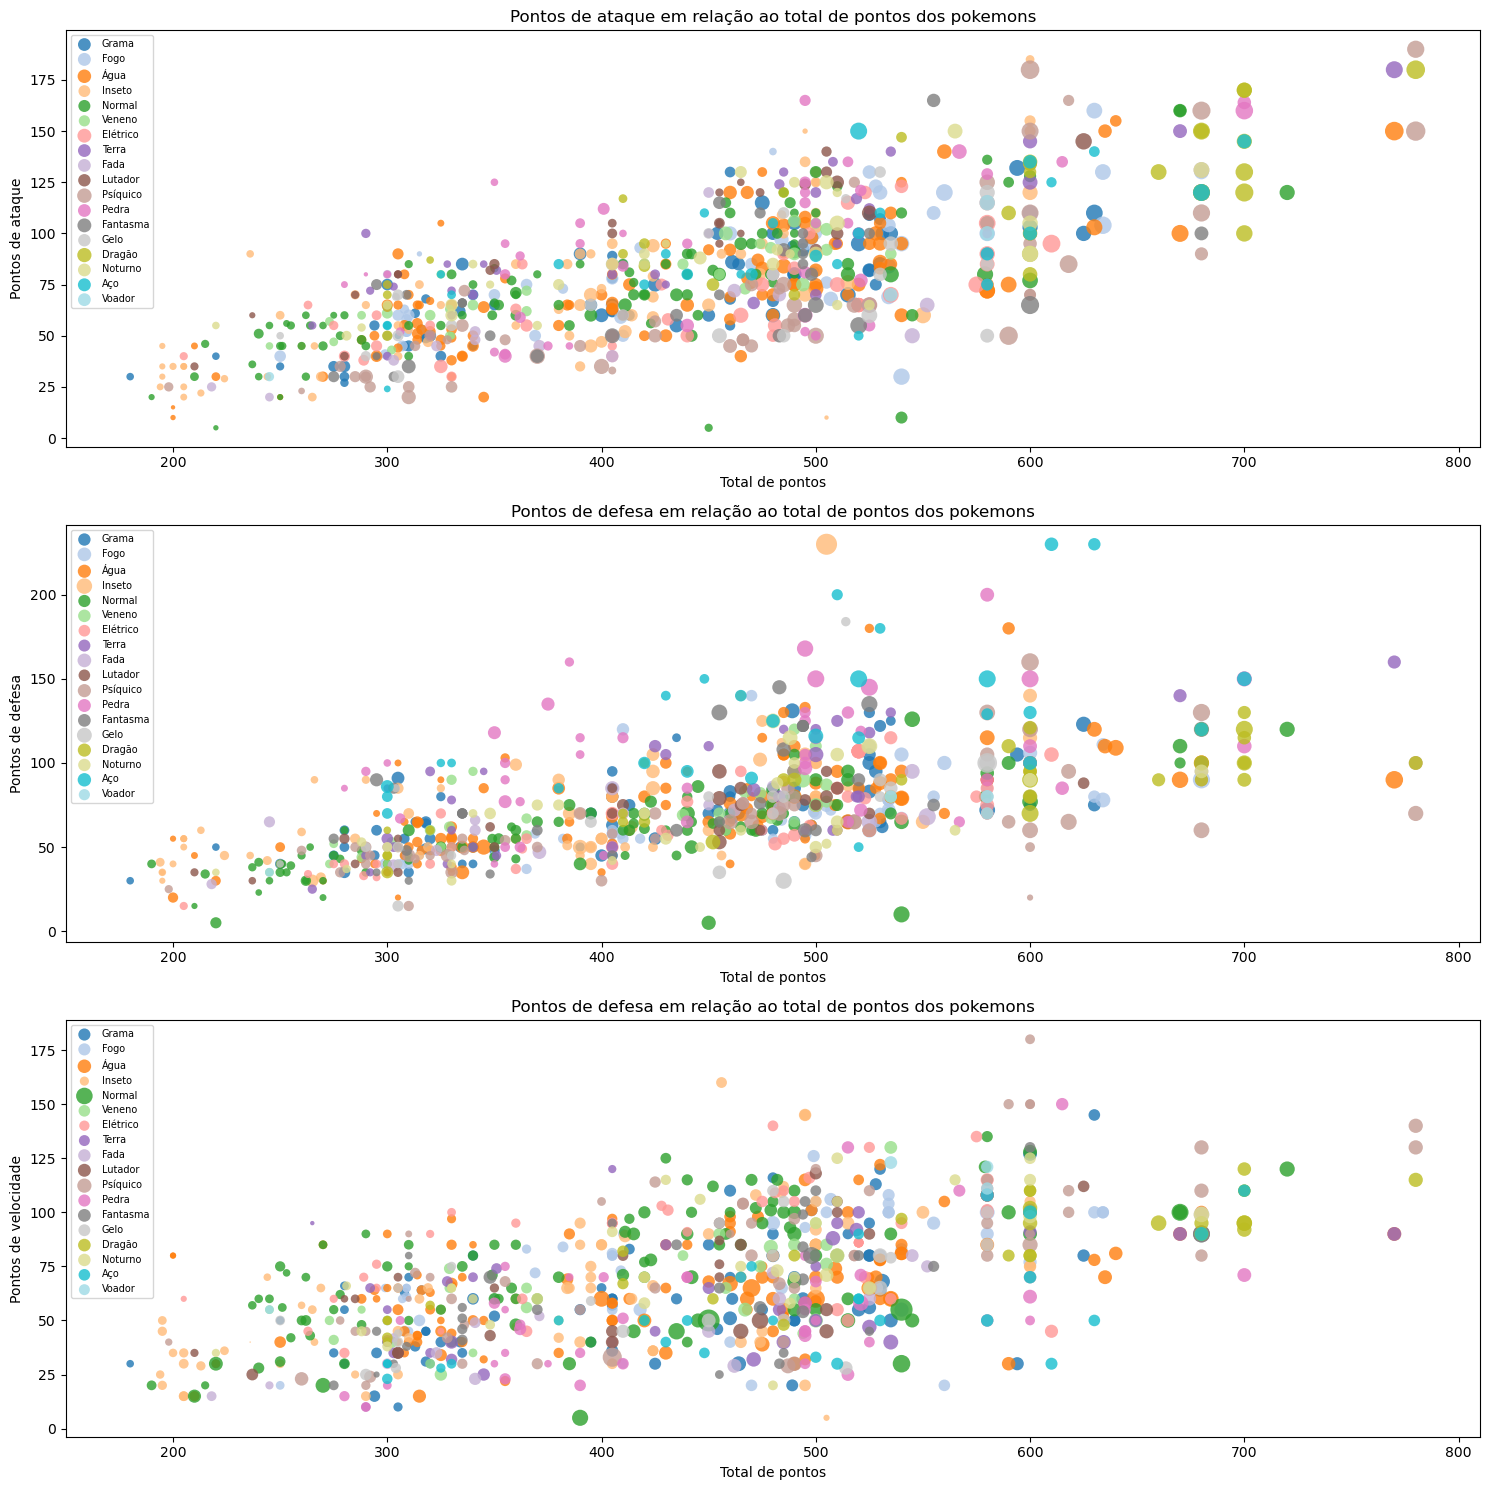

In [686]:
#3 Gráficos de dispersão
#em método semelhante, 18 números são criados, espaçados homogeneamente entre 0 e 1 por meio da ->
#função linspace e todos guardados em array NumPy
color = np.array(np.linspace(0,1,18))

#dois dicionários(invertidos entre si) criados para momentos diferentes, 
dic_cor = dict(zip(tipo_unico, color))
dic_cor2 =dict(zip(color, tipo_unico))

#criada uma nova coluna com vqlores copiados de outra
df['colors_for_types'] = df['Type 1']

#essa coluna receberá os valores das cores por meio da substituição do tipo pela cor do tipo
df['colors_for_types'].replace(dic_cor, inplace=True)

#cmap é a váriavel que guarda a paleta de cores escolhida, no caso a 'tab20', por ter mais cores distintas
cmap = plt.cm.tab20

#a figura2 e o axes2 são criados por meio da função subplot(), que cria na uma matriz 3 por 1 de ambas variáveis
fig2, axes_2 = plt.subplots(figsize=(15,15), dpi=100,
                 nrows = 3, ncols = 1)

#for loop rodando em cima de um groupby(), função que divide a coluna escolhida em grupos de seus valores;
#para cada instância temos um valor e um dataframe menor do grupo com as mesmas colunas 
for i, dff in df.groupby('colors_for_types'):
    #agora 3 instâncias do axes_2 são plotadas em formato de 'scatter'(dispersão)
    #além disso, as váriaveis x,y,tamanho de cada bolinha são acessadas por coluna do mini dataframe
    #com isso o label já é disposta para ser aproveitada pela função da legenda, e ela é formada pelo método->
    #get(), que acessa o valor necessário com base na chave, mas para isso o dicionário normal não funcionaria,->
    #então por falta de opções tive que criar um outro invertido para conseguir acessar o que deveria ser a chave, ou seja,->
    #o nome do tipo de pokemon.
    axes_2[0].scatter(dff['Total'],dff['Attack'], s=dff['Sp. Atk'], c=cmap(dff['colors_for_types']), alpha=0.8,edgecolors='none', 
                      label="{}".format(dic_cor2.get(i)))
    #alpha no caso é o valor de transparência da bolinha de 0 a 1
    axes_2[1].scatter(dff['Total'], dff['Defense'], s=dff['Sp. Def'], c=cmap(dff['colors_for_types']), alpha=0.8,edgecolors='none', 
                      label="{}".format(dic_cor2.get(i)))
    #edgecolors seria a cor na borda da bolinha, que no caso ficará inexistente
    axes_2[2].scatter(dff['Total'], dff['Speed'], s=dff['HP'], c=cmap(dff['colors_for_types']), alpha=0.8, edgecolors='none', 
                      label="{}".format(dic_cor2.get(i)))
    
#nomes do eixo x,y e titulo, alem da legenda para cada instância
axes_2[0].set_xlabel('Total de pontos')
axes_2[0].set_ylabel('Pontos de ataque')
axes_2[0].set_title('Pontos de ataque em relação ao total de pontos dos pokemons')
#a legenda tem o loc para a colocar no canto, e o dicionário de formatação ajustando seu tamanho para caber todos os termos 
axes_2[0].legend(loc=2, prop={'size': 7})

axes_2[1].set_xlabel('Total de pontos')
axes_2[1].set_ylabel('Pontos de defesa')
axes_2[1].set_title('Pontos de defesa em relação ao total de pontos dos pokemons')
axes_2[1].legend(loc=2, prop={'size': 7})

axes_2[2].set_xlabel('Total de pontos')
axes_2[2].set_ylabel('Pontos de velocidade')
axes_2[2].set_title('Pontos de defesa em relação ao total de pontos dos pokemons')
axes_2[2].legend(loc=2, prop={'size': 7})

#savefig() permite salvar o gráfico no diretório do código
plt.savefig("Gráfico_Scatterplots.png", dpi=300, bbox_inches='tight')

#tight_layout permite dispor melhor os gráficos de forma a não ter sobreposição
plt.tight_layout()
plt.show()

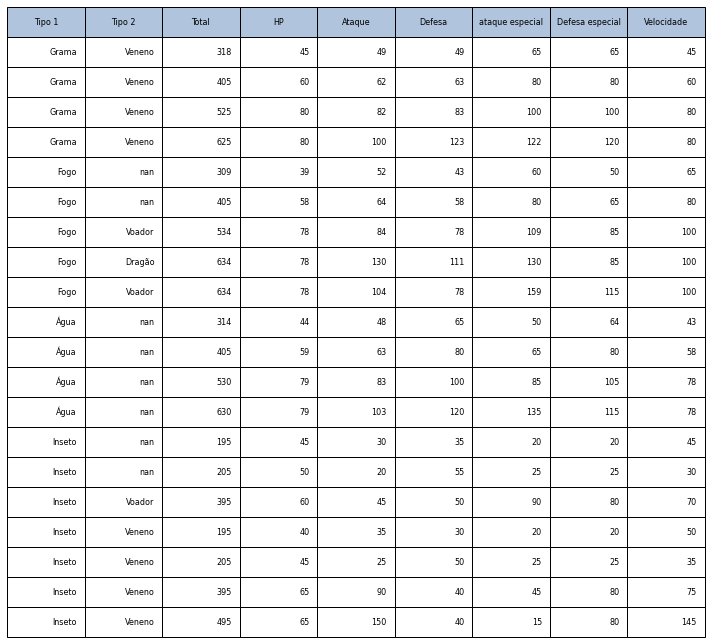

In [693]:
#Plotagem de tabela
#um dataframe diminuido é feito selecionando as colunas para deixar valores indesejados
pre_tabela = df.iloc[:,1:-5]

#plotagem da figura, especificando grossura de linha e seu tamanho
plt.figure(linewidth=2, figsize=(5,3))

#função plt.gca() institui o novo axes('get current axes')
axes_3 = plt.gca()
#agora o ax tem seus dois eixos em modo invisível
axes_3.get_xaxis().set_visible(False)
axes_3.get_yaxis().set_visible(False)
    
#plot box em modo None remove a caixa do ax
plt.box(on=None)

#Este for loop serve somente para transformar as colunas em Series do NumPy a fim de funcionar com outras funções
for c in pre_tabela.columns:
    pre_tabela[c] = pd.Series(df[c], index = df.index)

#Aqui é feita a tradução dos nomes de colunas
pre_tabela.columns = ['Tipo 1', 'Tipo 2', 'Total', 'HP','Ataque','Defesa', 'ataque especial',
                     'Defesa especial', 'Velocidade']

#Por fim, construi a tabela dentro de uma função, que permite plotar apenas até o número de linhas desejado, pois esta é muito grande
def func_tabela(tab, num): #parametros dataframe original e um numero
    #to_numpy() converte o dataframe em array do NumPY
    pre_tabela2 =tab.to_numpy()
    #tabela construida e atribuída a uma variável para depois ser ajustada
    #cellText são os valores, estes dispostos até determinado número
    tabela = plt.table(cellText=pre_tabela2[0:num,:],
                       #posicionamento da tabela centralizado
                      loc='center',
                       #cores das colunas, segundo a qual uma lista de mesma cor
                      colColours = ['lightsteelblue']*len(tab.columns),
                       # atribuição do cabeçalho
                      colLabels=tab.columns)
    #Ajuste de tamanho das letras
    tabela.set_fontsize(14)
    #Ajuste de escala da tabela
    tabela.scale(2.5,2.5)
    return tabela

#função chamando com base no dataframe em questão e 20 linhas
func_tabela(pre_tabela,20)

#savefig() permite salvar o gráfico no diretório do código
plt.savefig("Gráfico_tabela1.png", dpi=3000,bbox_inches='tight')

plt.show()